In [0]:
import pandas as pd
import logging
import glob
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 500)


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
data1_link = 'https://drive.google.com/open?id=1fjlUmii13wsmX8p5WEHaWI4saowq3uxq'
data2_link = 'https://drive.google.com/open?id=1DFp0B7JiTiz3mkY5gUxMuLzkFPn_nh_4'
data3_link = 'https://drive.google.com/open?id=1lxGpfbWDT7PaXdpKsETuLDIF8yt3beF6'
fluff, id1 = data1_link.split('=')
fluff, id2 = data2_link.split('=')
fluff, id3 = data3_link.split('=')

downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('articles1.csv') 

#downloaded = drive.CreateFile({'id':id2}) 
#downloaded.GetContentFile('articles2.csv')

downloaded = drive.CreateFile({'id':id3}) 
downloaded.GetContentFile('articles3.csv')

In [5]:
df1 = pd.read_csv('articles1.csv')
#df2 = pd.read_csv('articles2.csv')
#df3 = pd.read_csv('articles3.csv')
df1 = df1.dropna(subset=['title', 'content'])
#df2 = df2.dropna(subset=['title', 'content'])
#df3 = df3.dropna(subset=['title', 'content'])

df1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Health Care Suit - The New York Times,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,"WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could co..."
1,1,17284,Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze. The South Bronx, just across the Harlem River from Manhattan and once shorthand for urban dysfunction, still suffers violence at levels long ago slashed in many other parts of New York City. And yet the city’s efforts to fight it remain splintered, underfunded and burdened by scandal. In the 4..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106 - The New York Times",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, critics praised its spare, haunting visual style, vastly different from anything Disney had done before. But what they did not know was that the film’s striking appearance had been created by a Chinese immigrant artist, who took as his inspiration the landscape paintings of the Song dynasty. The extent of his contribution to “Bambi,” which remains a mark for film animation, would not be widely known for decades. Like the film’s title character, th..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music - The New York Times",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t necessarily evenhanded. Of all the fields of endeavor that suffered mortal losses in 2016 — consider Muhammad Ali and Arnold Palmer in sports and the Hollywood deaths of Carrie Fisher and Debbie Reynolds — the pop music world had, hands down, the bleakest year. Start with David Bowie, whose stage persona — androgynous glam rocker, dance pop star, electronic experimentalist — was as as his music. The year was only days old when..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile - The New York Times,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, Kim said on Sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile — a bold statement less than a month before the inauguration of Donald J. Trump. Although North Korea has conducted five nuclear tests in the last decade and more than 20 ballistic missile tests in 2016 alone, and although it habitually threatens to attack the United States with nuclear weapons, the country h..."


In [0]:
#body_raw = df1.content.tolist() + df2.content.tolist() + df3.content.tolist()
#title_raw = df1.title.tolist() + df2.title.tolist() + df3.title.tolist()

body_raw = df1.content.tolist() #+ df2.content.tolist() + df3.content.tolist()
title_raw = df1.title.tolist() #+ df2.title.tolist() + df3.title.tolist()

In [0]:
import numpy as np
import re           
from nltk.corpus import stopwords   
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [0]:
conterct_dic= {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [9]:
import nltk
nltk.download('stopwords')
stop_set = set(stopwords.words('english')) 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def clean_body(line):
    cleaned_line = line.lower()
    cleaned_line = re.sub(r'\([^)]*\)','', cleaned_line)
    cleaned_line = re.sub('"','', cleaned_line)
    cleaned_line = ' '.join([conterct_dic[t] if t in conterct_dic else t for t in cleaned_line.split(' ')])    
    cleaned_line = re.sub(r"'s\b",'', cleaned_line)
    cleaned_line = re.sub(r'[^a-zA-Z.!? ]','', cleaned_line)
    words = [woord for woord in cleaned_line.split() if not woord in stop_set]
    final_cleaned_line=[]
    for w in words:
        if len(w)>=3:                 
            final_cleaned_line.append(w)   
    return (" ".join(final_cleaned_line)).strip()

def clean_title(text):
    cleaned_line = re.sub('"','', text)
    cleaned_line = ' '.join([contraction_mapping[t] if t in conterct_dic else t for t in cleaned_line.split(" ")])    
    cleaned_line = re.sub(r"'s\b",'', cleaned_line)
    cleaned_line = re.sub(r'[^a-zA-Z.!? ]','', cleaned_line)
    cleaned_line = cleaned_line.lower()
    words=cleaned_line.split()
    final_cleaned_line=''
    for w in words:
        if len(w)>1:                                 
            final_cleaned_line=final_cleaned_line + w + ' '  
 
    return cleaned_line
    



In [0]:
cleaned_title = []
for t in title_raw:
    cleaned_title.append(clean_title(t))

In [0]:
cleaned_bodies = []
for body in body_raw:
    cleaned_bodies.append(clean_body(body))



In [0]:
data = pd.DataFrame(data = cleaned_bodies, columns =['cleaned_bodies']) 
data['cleaned_title'] = cleaned_title
data['cleaned_title'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)
data = data.reindex()

In [41]:
data

,cleaned_bodies,cleaned_title
0,washington congressional republicans new fear comes health care lawsuit obama administration might win. incoming trump administration could choose longer defend executive branch suit challenges ad...,house republicans fret about winning their health care suit the new york times
1,bullet shells get counted blood dries votive candles burn people peer windows see crime scenes gone cold band yellow police tape blowing breeze. south bronx across harlem river manhattan shorthand...,rift between officers and residents as killings persist in south bronx the new york times
2,walt disneys bambi opened critics praised spare haunting visual style vastly different anything disney done before. know films striking appearance created chinese immigrant artist took inspiration...,tyrus wong bambi artist thwarted by racial bias dies at the new york times
3,death may great equalizer isnt necessarily evenhanded. fields endeavor suffered mortal losses consider muhammad ali arnold palmer sports hollywood deaths carrie fisher debbie reynolds pop music wo...,among deaths in a heavy toll in pop music the new york times
4,seoul south korea north koreas leader kim said sunday country making final preparations conduct first test intercontinental ballistic missile bold statement less month inauguration donald trump. a...,kim jongun says north korea is preparing to test longrange missile the new york times
...,...,...
49995,chairman ceo exxonmobil rex tillerson admitted climate change real. january said company favor carbon tax. years later exxon endorsed paris agreement. never clear whether exxons leaders actually s...,rex tillerson says climate change is real but
49996,ive spent nearly years looking intelligence challenges including failures. means getting call silent deadly organizational causes failure news tends gravitate toward salacious elements story like ...,the biggest intelligence questions raised by the trump dossier
49997,donald trump taking necessary steps resolve conflicts interest takes office. press conference today first since june trump lawyer sheri dillon laid plans claimed would resolve questions conflicts ...,trump announces plan that does little to resolve his conflicts of interest
49998,dozens colleges could forced close next several years. week obama administration published list schools programs risk losing access federal loans many depend survive. vocational programs departmen...,dozens of forprofit colleges could soon close


In [42]:

for i in range(5):
    print("Body:",data['cleaned_bodies'][i])
    print("Title:",data['cleaned_title'][i])
    print("\n")

Body: washington congressional republicans new fear comes health care lawsuit obama administration might win. incoming trump administration could choose longer defend executive branch suit challenges administrations authority spend billions dollars health insurance subsidies americans handing house republicans big victory issues. sudden loss disputed subsidies could conceivably cause health care program implode leaving millions people without access health insurance republicans prepared replacement. could lead chaos insurance market spur political backlash republicans gain full control government. stave outcome republicans could find awkward position appropriating huge sums temporarily prop obama health care law angering conservative voters demanding end law years. another twist donald trumps administration worried preserving executive branch prerogatives could choose fight republican allies house central questions dispute. eager avoid ugly political pileup republicans capitol hill tru

In [0]:
import matplotlib.pyplot as plt
body_word_count = []
title_word_count = []

for i in data['cleaned_bodies']:
  body_word_count.append(len(i.split()))
for i in data['cleaned_title']:
  title_word_count.append(len(i.split()))

body_df = pd.DataFrame({'body':body_word_count})
title_df = pd.DataFrame({'title':title_word_count})



(0, 2000)

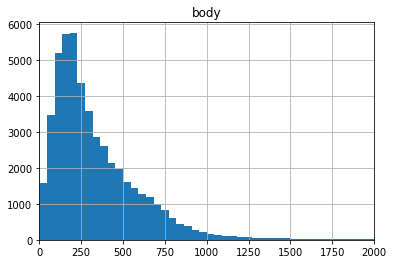

In [51]:
body_df.hist(bins = 300)
plt.xlim(0,2000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2240e6080>]],
      dtype=object)

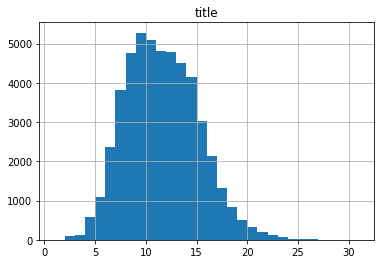

In [52]:
title_df.hist(bins = 30)


In [0]:

max_text_len=500 
max_len_text = max_text_len
max_summary_len=25
max_len_summary = max_summary_len

In [0]:

data.to_csv('cleaned_data.csv', index=False)